In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('household_power_consumption.csv', low_memory=False)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [5]:
(4.216 * 1000/60) - 0.0 - 1.0 - 17.0

52.266666666666666

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [3]:
dataset.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [4]:
dataset['Sub_metering_3'] = dataset['Sub_metering_3'].fillna(dataset['Sub_metering_3'].mean())

In [5]:
dataset.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [21]:
# Feature Modification
from sklearn.impute import SimpleImputer

df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df.replace(['?', 'nan', np.nan], -1, inplace=True) 
num_vars= ['Global_active_power', 'Global_reactive_power', 'Voltage', 
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in num_vars:
    df[i] = pd.to_numeric(df[i])
imp = SimpleImputer(missing_values=-1, strategy='mean')
df[num_vars] = imp.fit_transform(df[num_vars])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [22]:
# Target Variable
eq1 = (df['Global_active_power']*1000/60) 
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] - df['Sub_metering_3']
df['power_consumption'] = eq1 - eq2
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,86.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,104.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,104.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,105.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,77.100000


In [25]:
import seaborn as sns
sns.set(rc={'figure.figsize': (12,8)})

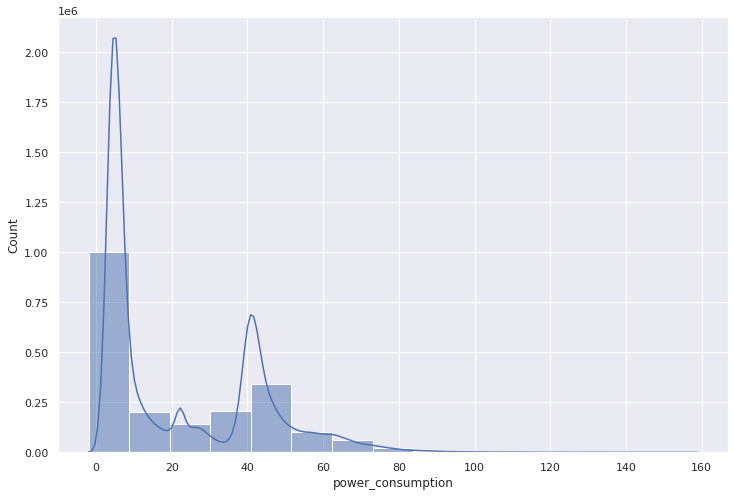

In [26]:
# Distribution of the target variables
sns.histplot(data=df, x='power_consumption', bins=15, kde=True)
plt.show()

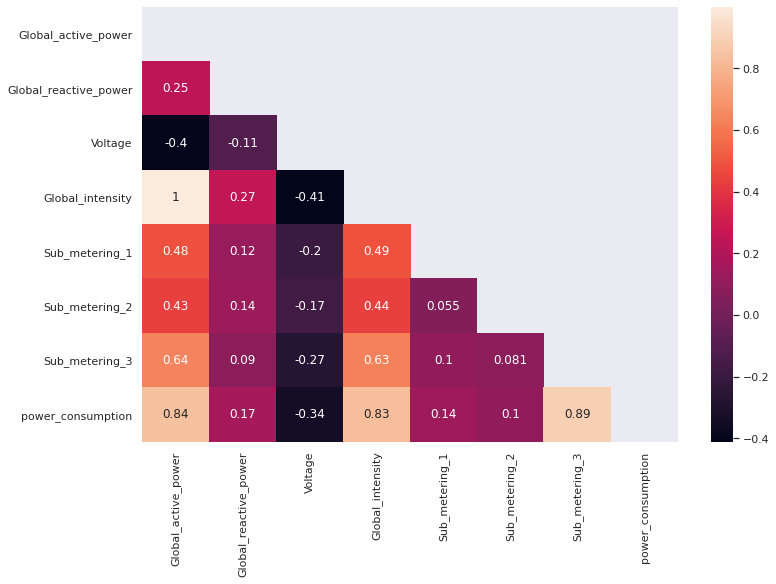

In [27]:
corr = np.corrcoef(df.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()

In [28]:
import random 
random.seed(123)

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import operator as op


In [29]:
models = {}
df1 = df
df1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,86.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,104.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,104.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,105.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,77.100000


In [44]:
class polymodel():
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def pre_processing(self):
        cat = ['Date', 'Time', 'power_consumption']

        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, 
                                                            test_size = 0.2, 
                                                            random_state = 42)
        return self

    def fit_pred_acc(self):
        reg = LinearRegression(normalize=True)
        pol_feat = PolynomialFeatures(2)

        X_train_transf = pol_feat.fit_transform(self.X_train)
        X_test_transf = pol_feat.fit_transform(self.X_test)

        model = reg.fit(X_train_transf, self.Y_train)
        pred = model.predict(X_test_transf)

        mae = round(skm.mean_absolute_error(self.Y_test, pred), 2)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)
        r2_score = round(skm.r2_score(self.Y_test, pred), 4)
        ev = round(skm.explained_variance_score(self.Y_test, pred), 4)
    
        return (model, X_test_transf, pred, mae, rmse, r2_score, ev)
    
poly = polymodel(df, 'Global_active_power')
poly = poly.pre_processing()
models, X_test_transf, pred, mae, rmse, r2_score, ev = poly.fit_pred_acc()

In [45]:
X_test_transf

array([[1.0000e+00, 1.0600e-01, 2.4200e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.0000e+00, 3.5200e-01, 2.3722e+02, ..., 4.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.9400e-01, 2.3866e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 2.4637e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0800e-01, 2.4324e+02, ..., 4.0000e+00, 2.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.6200e-01, 2.4476e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [46]:
pred

array([0.27123948, 0.47412052, 0.72378227, ..., 0.34256875, 0.27043559,
       0.21343444])

In [47]:
mae     # Mean absolute error

0.02

In [48]:
rmse        # Root mean squared error

0.04

In [49]:
r2_score        # R^2 score

0.9988

In [50]:
ev      # Explained variance score

0.9988

In [53]:
import pickle

pickle.dump(models, open('household_power_consumption.pkl','wb'))